### **Exemplo Eigenfaces**

---

Gabriel Oukawa <br>
Álgebra linear para ciência de dados <br>
2º Semestre de 2025

---


# 0. Carregar dados de entrada



In [2]:
import numpy as np
import gdown
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [3]:
# Baixar dados de entrada
gdown.download(id='1S16zzLC_Y-zEaxw1O__kcQB7hCjdD-u_', output='allFaces.mat', quiet=True)

'allFaces.mat'

# 1. Conjunto de dados


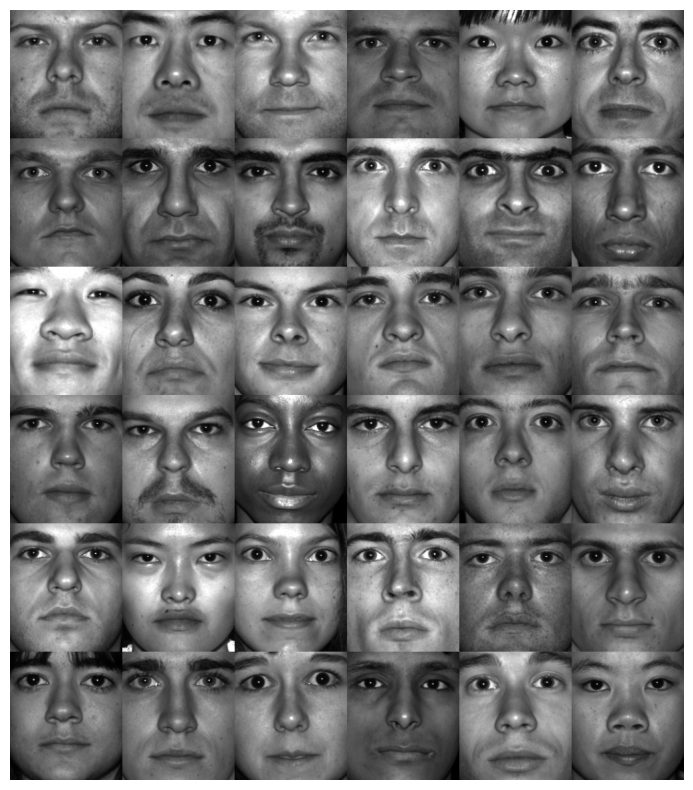

In [4]:
# Carregar conjunto de dados (36 pessoas/rostos)
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 18})

mat_contents = loadmat('allFaces.mat', matlab_compatible=True)
faces = mat_contents['faces']

m = int(mat_contents['m'][0,0])
n = int(mat_contents['n'][0,0])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

allPersons = np.zeros((n*6, m*6))
count = 0

for j in range(6):
    for k in range(6):
        idx = int(np.sum(nfaces[:count]))
        allPersons[j*n : (j+1)*n, k*m : (k+1)*m] = np.reshape(faces[:, idx], (m,n)).T
        count += 1

plt.imshow(allPersons, cmap='gray')
plt.axis('off')
plt.show()

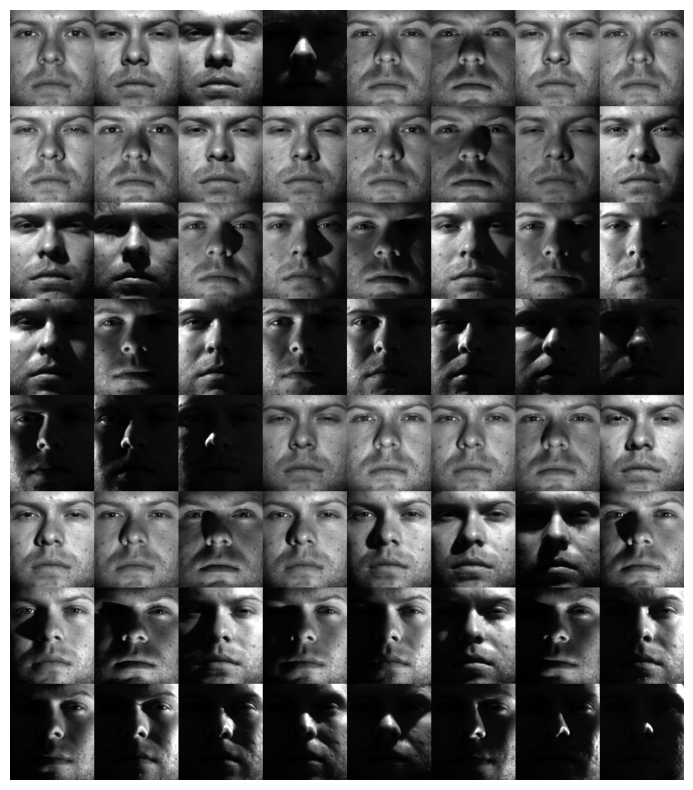

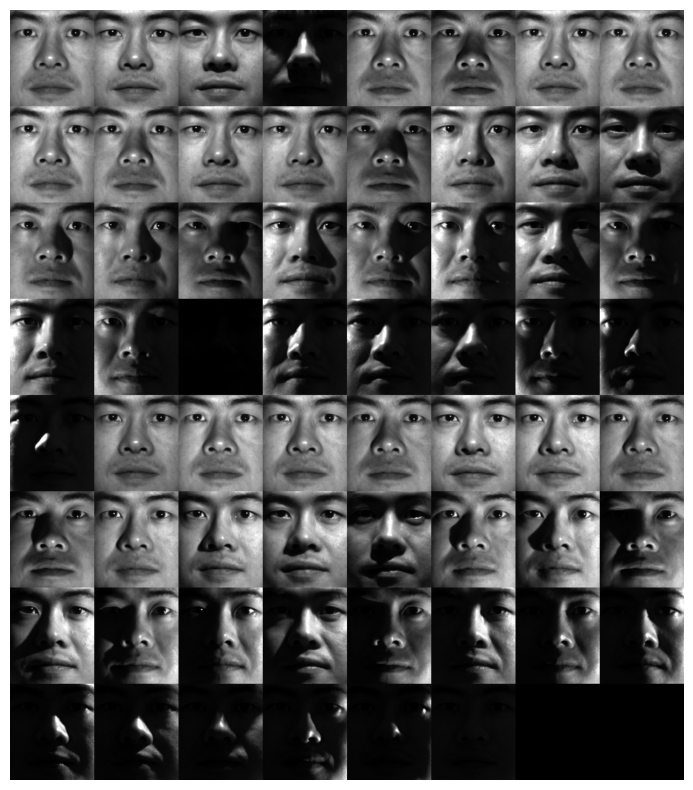

In [19]:
# Mostrar variações para duas pessoas
for person in range(2): # range(len(nfaces)):
    start = int(sum(nfaces[:person]))
    end   = int(sum(nfaces[:person+1]))
    subset = faces[:, start:end]

    allFaces = np.zeros((n*8, m*8))
    count = 0

    for j in range(8):
        for k in range(8):
            if count < nfaces[person]:
                allFaces[j*n:(j+1)*n, k*m:(k+1)*m] = np.reshape(subset[:, count], (m, n)).T
                count += 1

    plt.imshow(allFaces, cmap='gray')
    plt.axis('off')
    plt.show()


# 2. Cálculo do rosto "médio" e reconstrução via SVD


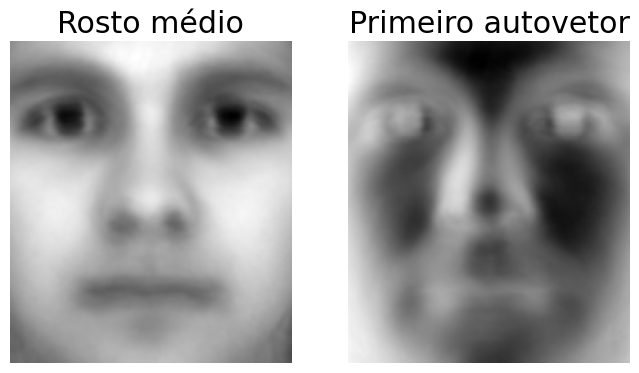

In [11]:
# Rosto médio e primeiro autovetor
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

faces = mat_contents['faces']
m = int(mat_contents['m'][0,0])
n = int(mat_contents['n'][0,0])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

trainingFaces = faces[:, :int(np.sum(nfaces[:36]))]
avgFace = np.mean(trainingFaces, axis=1)  # size n*m by 1

X = trainingFaces - np.tile(avgFace, (trainingFaces.shape[1],1)).T
U, S, VT = np.linalg.svd(X, full_matrices=0)

fig1 = plt.figure()

ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(avgFace, (m,n)).T, cmap='gray')
ax1.axis('off')
ax1.set_title('Rosto médio')

ax2 = fig1.add_subplot(122)
img_u1 = ax2.imshow(np.reshape(U[:,0], (m,n)).T, cmap='gray')
ax2.axis('off')
ax2.set_title('Primeiro autovetor')

plt.show()

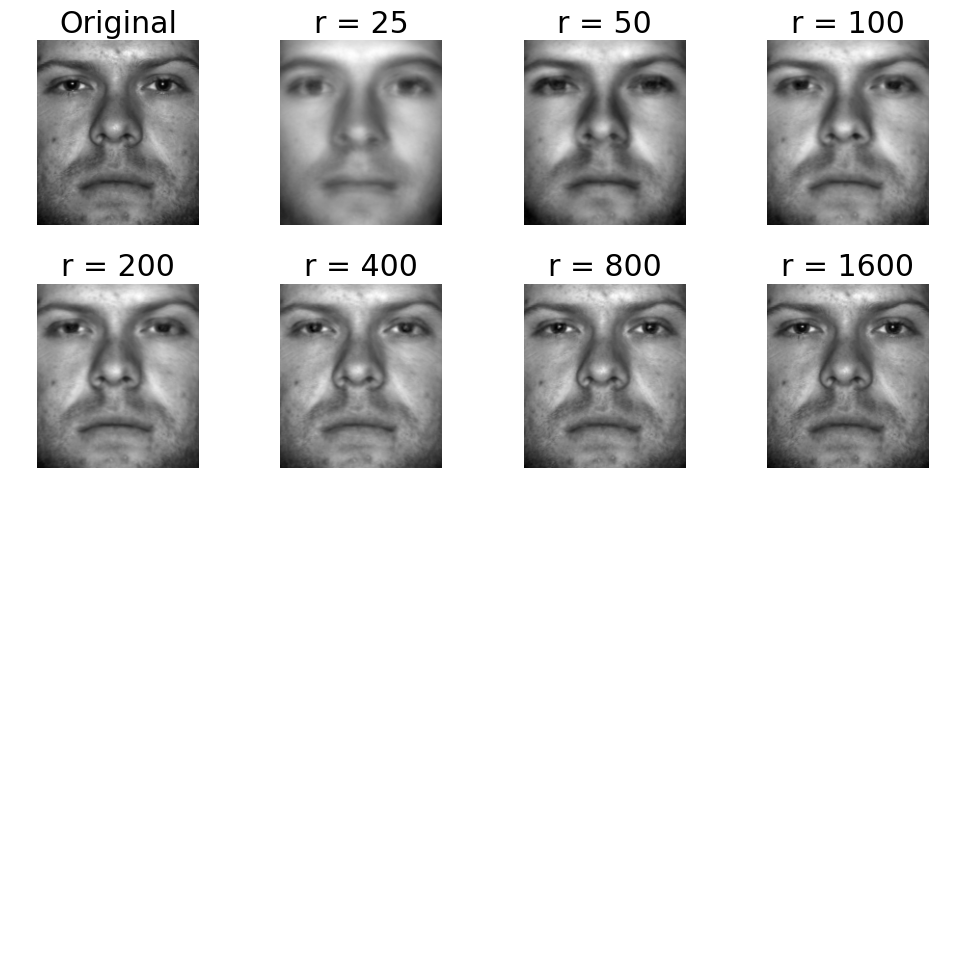

In [18]:
# Reconstrução por SVD
start_index = int(np.sum(nfaces[:0]))  # número da pessoa/rosto
if start_index >= faces.shape[1]:
    raise ValueError(f"start_index {start_index} exceeds number of faces {faces.shape[1]}")

testFace = faces[:, start_index]
testFaceMS = testFace - avgFace

r_list = [0, 25, 50, 100, 200, 400, 800, 1600]  # 0 = original

fig, axes = plt.subplots(4, 4, figsize=(10, 10))
axes = axes.flatten()

for i, r in enumerate(r_list):
    ax = axes[i]
    if r == 0:
        img = testFace.reshape(m, n).T
        title = 'Original'
    else:
        reconFace = avgFace + U[:, :r] @ (U[:, :r].T @ testFaceMS)
        img = reconFace.reshape(m, n).T
        title = f'r = {r}'

    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

for j in range(len(r_list), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

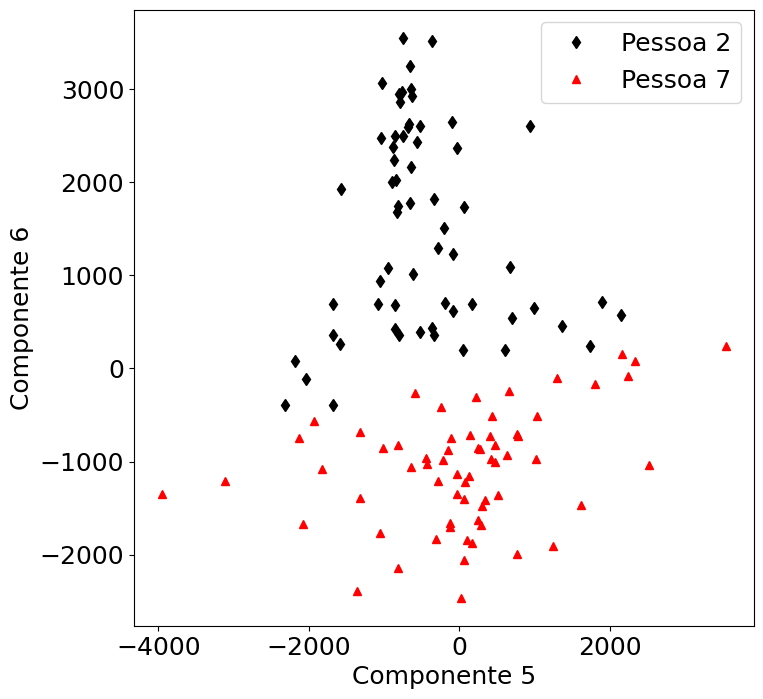

In [21]:
# Projeção em componentes principais (5 e 6)
P1num = 2  # Pessoa 2
P2num = 7  # Pessoa 7

start1 = int(np.sum(nfaces[:(P1num-1)]))
end1   = int(np.sum(nfaces[:P1num]))
start2 = int(np.sum(nfaces[:(P2num-1)]))
end2   = int(np.sum(nfaces[:P2num]))

P1 = faces[:, start1:end1]
P2 = faces[:, start2:end2]

P1 = P1 - np.tile(avgFace, (P1.shape[1], 1)).T
P2 = P2 - np.tile(avgFace, (P2.shape[1], 1)).T

PCAmodes = [5, 6]
PCACoordsP1 = U[:, [m-1 for m in PCAmodes]].T @ P1
PCACoordsP2 = U[:, [m-1 for m in PCAmodes]].T @ P2

plt.plot(PCACoordsP1[0,:], PCACoordsP1[1,:], 'd', color='k', label='Pessoa 2')
plt.plot(PCACoordsP2[0,:], PCACoordsP2[1,:], '^', color='r', label='Pessoa 7')

plt.legend()
plt.xlabel('Componente 5')
plt.ylabel('Componente 6')
plt.show()